## import modules

In [1]:
import os, cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

## prepare data

### Fetch data

In [3]:
# download mnist digit classification data
(trainX, trainy), (testX, testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# resize train images to 32x32
trainX = np.expand_dims(trainX, axis=-1)
trainX = tf.image.resize(trainX, [32,32]).numpy().astype("uint8")
trainX.shape, trainy.shape

((60000, 32, 32, 1), (60000,))

In [5]:
# resize test images to 32x32
testX = np.expand_dims(testX, axis=-1)
testX = tf.image.resize(testX, [32,32]).numpy().astype("uint8")
testX.shape, testy.shape

((10000, 32, 32, 1), (10000,))

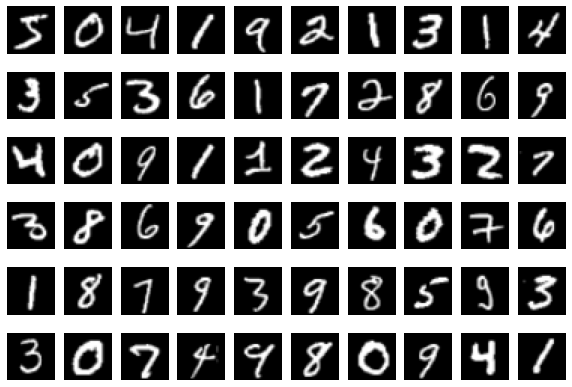

In [6]:
# view train data
H=6
W=10
c=H*W

_,ax=plt.subplots(H,W, figsize=(10,7))
ax=ax.ravel()

for i in range(c):
    im=trainX[i][:,:,0]
    ax[i].imshow(im, cmap='gray')
    ax[i].axis('off')

plt.show()

In [7]:
# view train output data
trainy

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### prepare data for training

In [8]:
# flatten the image to 1D array
train_X_n=trainX.copy()/255
test_X_n=testX.copy()/255

train_X_n.shape, test_X_n.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

In [9]:
# one hot encoding of train Y
train_Y_oh=np.zeros((len(trainy), 10))
train_Y_oh[ np.arange(trainy.size), trainy ]=1

train_Y_oh.shape

(60000, 10)

In [10]:
# one hot encoding of test Y
test_Y_oh=np.zeros((len(testy), 10))
test_Y_oh[ np.arange(testy.size), testy ]=1

test_Y_oh.shape

(10000, 10)

In [11]:
# onr hot emcoding of train data for a sample
train_Y_oh[1,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## create model

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Input, Dense, Activation, Flatten
from tensorflow.keras.layers import  Conv2D, AveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

In [13]:
# define your model here for mnist digit classification

def create_model(H, W, n_classes):
    model=Sequential()

    model.add( Input((H, W, 1)) )

    model.add( Conv2D(filters=6, kernel_size=5, activation="relu") )
    model.add( AveragePooling2D(pool_size=2) )
    model.add( Activation("relu") )

    model.add( Conv2D(filters=16, kernel_size=5, activation="relu") )
    model.add( AveragePooling2D(pool_size=2) )
    model.add( Activation("relu") )

    model.add( Conv2D(filters=120, kernel_size=5, activation="relu") )

    model.add( Flatten() )

    model.add( Dense(84, activation="relu") )
    model.add( Dense(n_classes, activation='softmax') )

    return model


In [14]:
H=32
W=32

K.clear_session()
model=create_model(H, W, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [15]:
model.compile(optimizer=SGD(learning_rate=1E-1), loss='categorical_crossentropy', metrics='accuracy')

## train model

In [16]:
# choose hyperparameters

epochs=20
batch=256
no_of_steps=trainX.shape[0]//batch
no_of_steps

234

In [17]:
# model training
history=model.fit( train_X_n, train_Y_oh, 
          validation_data=(test_X_n, test_Y_oh), 
          epochs=epochs,
          batch_size=batch,
          steps_per_epoch=no_of_steps)

Epoch 1/20
234/234 [==============================] - 15s 8ms/step - loss: 0.9196 - accuracy: 0.7175 - val_loss: 0.2167 - val_accuracy: 0.9297
Epoch 2/20
234/234 [==============================] - 1s 6ms/step - loss: 0.1683 - accuracy: 0.9480 - val_loss: 0.1357 - val_accuracy: 0.9577
Epoch 3/20
234/234 [==============================] - 1s 6ms/step - loss: 0.1132 - accuracy: 0.9643 - val_loss: 0.0958 - val_accuracy: 0.9695
Epoch 4/20
234/234 [==============================] - 1s 6ms/step - loss: 0.0873 - accuracy: 0.9730 - val_loss: 0.0684 - val_accuracy: 0.9794
Epoch 5/20
234/234 [==============================] - 1s 6ms/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0657 - val_accuracy: 0.9795
Epoch 6/20
234/234 [==============================] - 1s 6ms/step - loss: 0.0625 - accuracy: 0.9807 - val_loss: 0.0632 - val_accuracy: 0.9793
Epoch 7/20
234/234 [==============================] - 1s 6ms/step - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.0664 - val_accuracy: 0.9795
Epoch

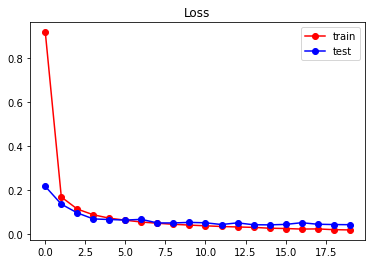

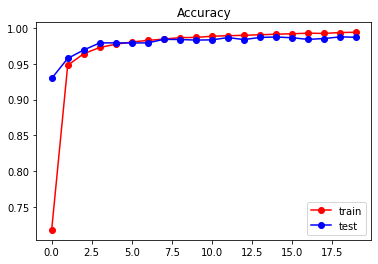

In [18]:
# metric/loss plotting

loss=history.history['loss']
test_loss=history.history['val_loss']
acc=history.history['accuracy']
test_acc=history.history['val_accuracy']

plt.plot(loss, '-ro')
plt.plot(test_loss, '-bo')
plt.legend(['train', 'test'])
plt.title("Loss")
plt.show()

plt.plot(acc, '-ro')
plt.plot(test_acc, '-bo')
plt.legend(['train', 'test'])
plt.title("Accuracy")
plt.show()

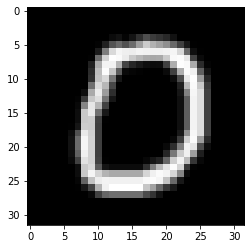

Actual    output :  0
Predicted output :  0


In [20]:
# test model on test-data

index=10
im=testX[index]

plt.imshow(im[:,:,0], cmap='gray'); plt.show()

im=im/255
im=np.expand_dims(im, axis=0)
im_np=np.array(im)

# ***************************************************

out_vector=model.predict(im_np)[0]
ind=np.argmax(out_vector)
gt=testy[index]

print("Actual    output : ", gt)
print("Predicted output : ", ind)

## Visualization

### filters

In [25]:
# view first CNN filter values
weights = model.get_layer("conv2d_1").get_weights()[0]

_,_,fan_in, filters=weights.shape

for i in range(filters):
    print("*"*100)
    fil=weights[:,:,:,i]
 
    for j in range(fan_in):
        x=fil[:,:,j]
        print(x)

    if i==0:
        break



****************************************************************************************************
[[ 0.06104496 -0.05413075 -0.09925957 -0.06231318 -0.08838086]
 [-0.00377306 -0.10225324  0.01287579  0.0194457  -0.02820286]
 [ 0.06299122  0.04245506  0.01425626 -0.0299529  -0.00228384]
 [-0.00952016  0.00499191 -0.00635161  0.08628754  0.09951404]
 [ 0.08153532 -0.08107987 -0.04124736 -0.0204743  -0.0017266 ]]
[[ 0.07562166  0.04758362 -0.01867489 -0.10163239  0.02773762]
 [-0.01881743  0.0833533   0.12966684 -0.01176712 -0.0191174 ]
 [-0.11457532  0.11233649  0.06221029  0.13497388 -0.07750664]
 [-0.10540941  0.06608352  0.12188844 -0.05848641  0.09937811]
 [-0.11381413  0.00916326  0.09013186  0.11766044  0.00561989]]
[[ 0.0591613   0.00678766 -0.07612881  0.10130689 -0.0947754 ]
 [-0.06221284  0.02058061  0.0873393  -0.09016132  0.01878406]
 [ 0.0003488  -0.09475464 -0.07551426 -0.03232742  0.0196065 ]
 [-0.01232138  0.10816975  0.06152625  0.08287759  0.07411667]
 [ 0.10009691 -

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


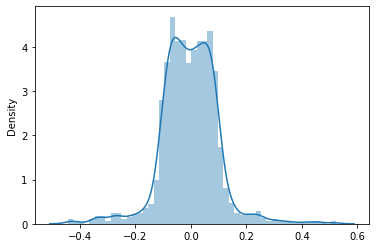

In [26]:
# get distribution of all weights for layer conv2d_1
weights = model.get_layer("conv2d_1").get_weights()[0]

sns.distplot(weights)
plt.show()

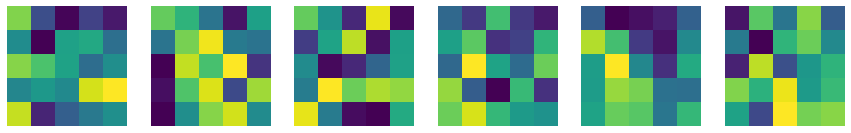

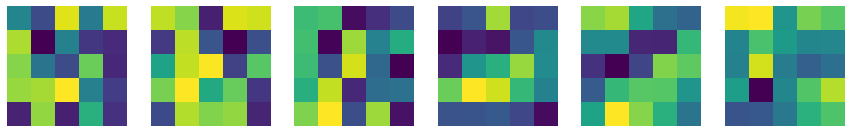

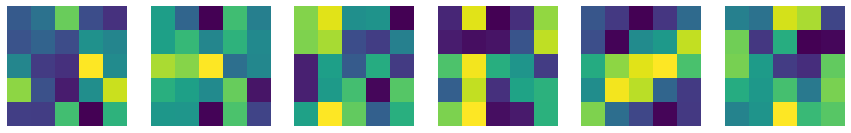

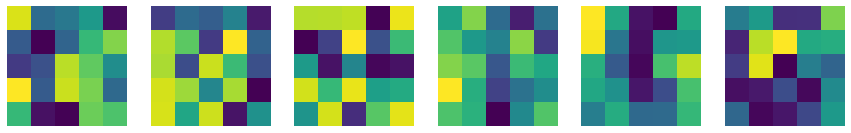

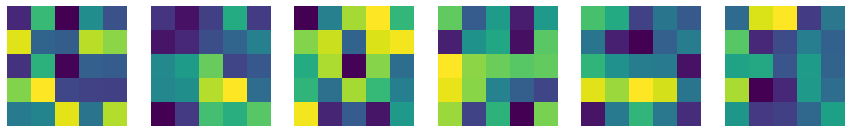

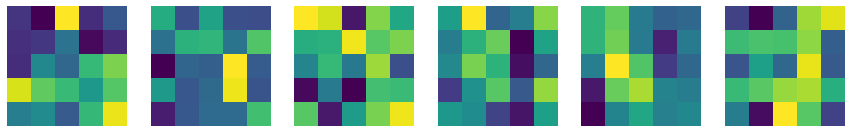

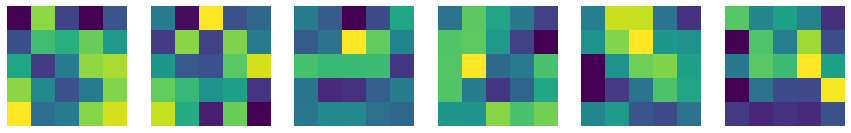

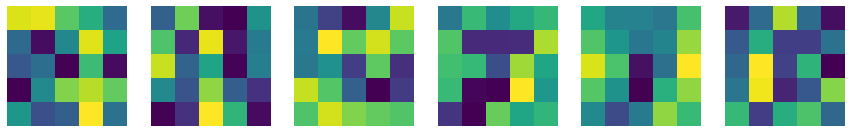

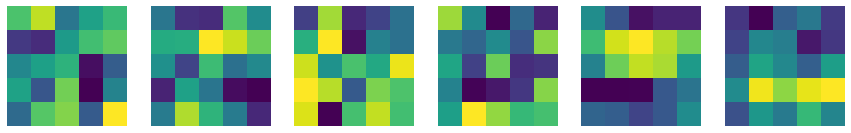

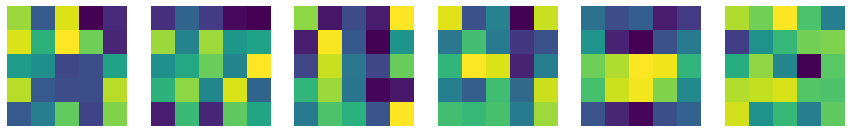

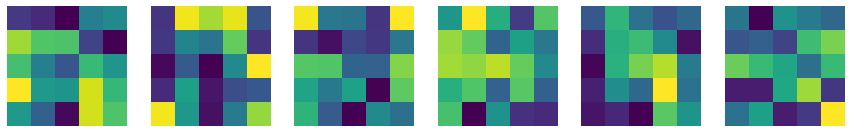

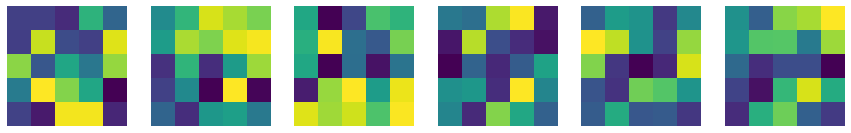

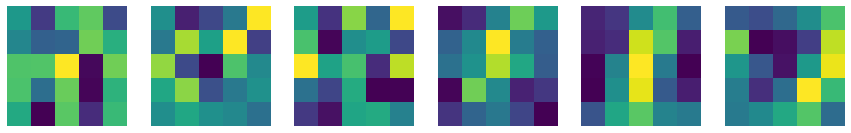

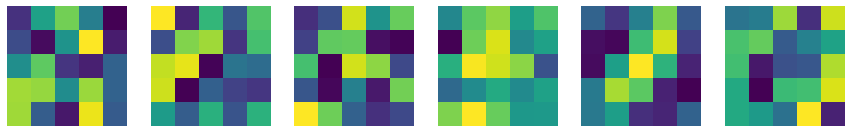

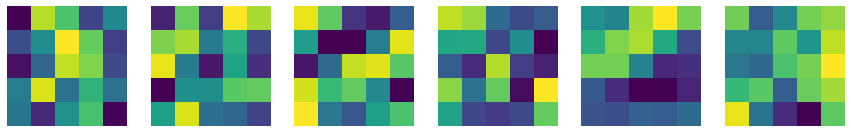

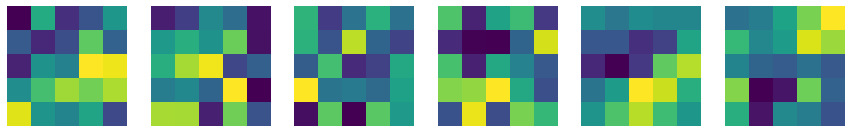

In [27]:
# view CNN filters of model layer conv2d_1
weights = model.get_layer("conv2d_1").get_weights()[0]

_,_,fan_in, filters=weights.shape

for i in range(filters):
    fil=weights[:,:,:,i]
    _,ax=plt.subplots(1,fan_in, figsize=(15,7))
    ax=ax.ravel()    

    for j in range(fan_in):
        x=fil[:,:,j]
        y=(x-x.min())/(x.max()-x.min())
        ax[j].imshow(y)
        ax[j].axis('off')

    plt.show()


### Bias

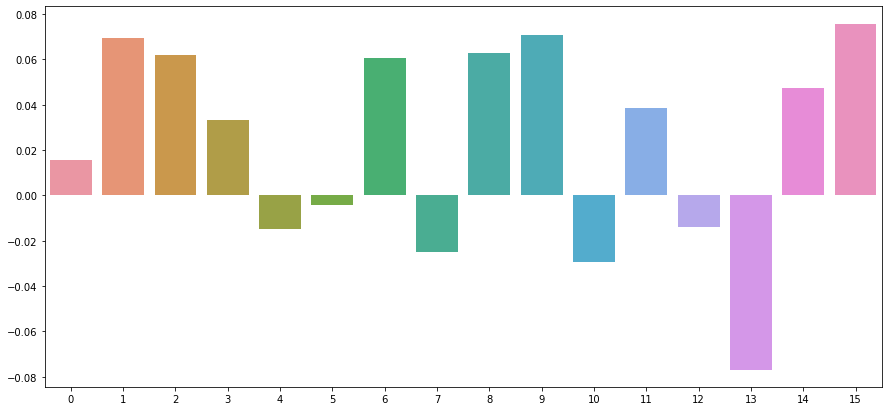

In [30]:
# visualize CNN filter bias
bias = model.get_layer("conv2d_1").get_weights()[1]

plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(bias)), y=bias)
plt.show()

### dense layer

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


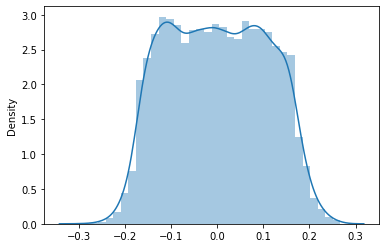

In [31]:
# get dense layer weight distribution
weights = model.get_layer("dense").get_weights()[0]
sns.distplot(weights)
plt.show()

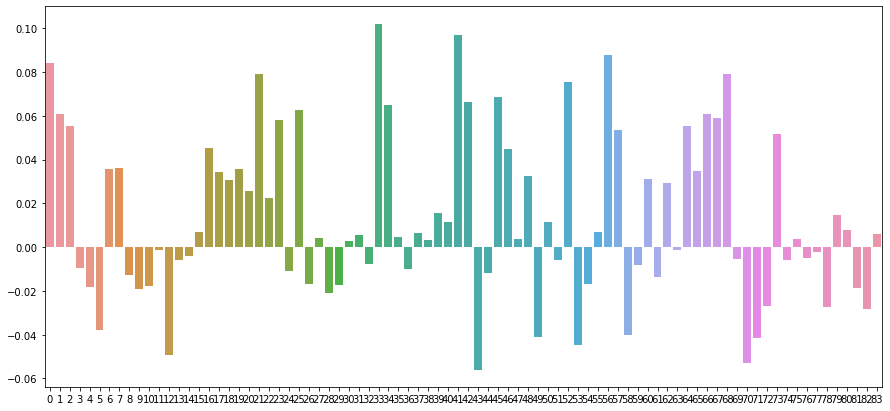

In [32]:
# visualize biases of the dense layer
weights = model.get_layer("dense").get_weights()[1]

plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(weights)), y=weights)
plt.show()

### feature maps

In [33]:
# create new model from from original to visualize of "conv2d" layer feature maps
model_2=Model(model.input, model.get_layer("conv2d").output)
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


Original image


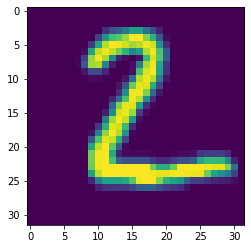

(28, 28, 6)
Feature maps


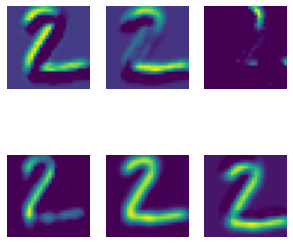

In [40]:
index=1

im=testX[index]
print("Original image")
plt.imshow(im[:,:,0]); plt.show()

im=im/255
im=np.expand_dims(im, axis=0)
im_np=np.array(im)

out=model_2.predict(im_np)[0]
print(out.shape)

# *********************************

_,_,channels=out.shape

n1=int(np.sqrt(channels))
n2=channels//n1
N=min(n1*n2, channels)
_,ax=plt.subplots(n1, n2, figsize=(5,5))
ax=ax.ravel()

print("Feature maps")

for i in range(N):
    fm=out[:,:,i]

    # ax[i].imshow(fm, cmap="gray")
    ax[i].imshow(fm)
    ax[i].axis("off")
plt.show()

In [36]:
# new model to visualize "conv2d_1" layer
model_3=Model(model.input, model.get_layer("conv2d_1").output)
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________

Original image


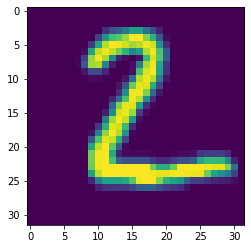

(10, 10, 16)
Feature maps


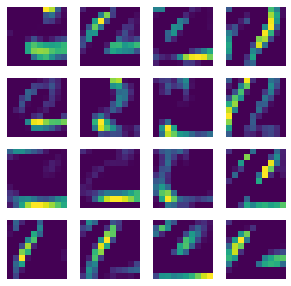

In [41]:
index=1

im=testX[index]
print("Original image")
plt.imshow(im[:,:,0]); plt.show()

im=im/255
im=np.expand_dims(im, axis=0)
im_np=np.array(im)

out=model_3.predict(im_np)[0]
print(out.shape)

# *********************************

_,_,channels=out.shape

n1=int(np.sqrt(channels))
n2=channels//n1
N=min(n1*n2, channels)
_,ax=plt.subplots(n1, n2, figsize=(5,5))
ax=ax.ravel()

print("Feature maps")

for i in range(N):
    fm=out[:,:,i]

    # ax[i].imshow(fm, cmap="gray")
    ax[i].imshow(fm)
    ax[i].axis("off")
plt.show()